In [13]:
'''
Author: Maurice Wilson

Objective 
-Follow instructions in "LM_Fit_exercise.pdf" 
'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import leastsq

In [14]:
x_vals = np.linspace(0,10, 300)

A = 10.
B=5.
C=2.
E=4.

Ag = 20
Bg = 7
Cg = 5.
Eg = 9

sig = 0.25

sigmas = np.ones(len(x_vals))*sig

In [15]:
noise = sigmas*np.random.randn(len(x_vals))  # IS this normal randomness correct?
Data = A*np.exp(-(1.0/2.0)*((B-x_vals)/C)**2)+E + noise

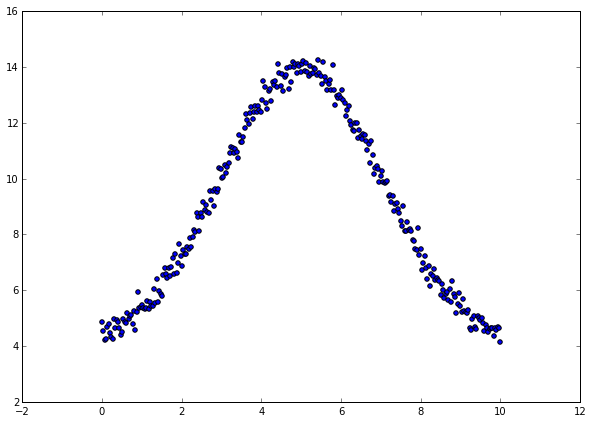

In [16]:

plt.figure(figsize=(10,7))
plt.scatter(x_vals, Data, marker='o')
plt.show()


In [17]:
eps_data = sig
def residual(vars, x_vals, Data, eps_data):
    amp = vars[0]
    centroid = vars[1]
    width = vars[2]
    offset = vars[3]

    model = amp*np.exp(-(1.0/2.0)*((centroid-x_vals)/width)**2)+offset # just the 'Data' without the noise 

    return (Data-model)/eps_data

In [20]:
def mwgaussfit(x_vals, Data, eps_data):
    vars = [Ag, Bg, Cg, Eg]
    out = leastsq(residual, vars, args=(x_vals, Data, eps_data))
    print(out)
    return out

(array([ 9.98891867,  5.00348487,  2.01781746,  3.97033792]), 1)


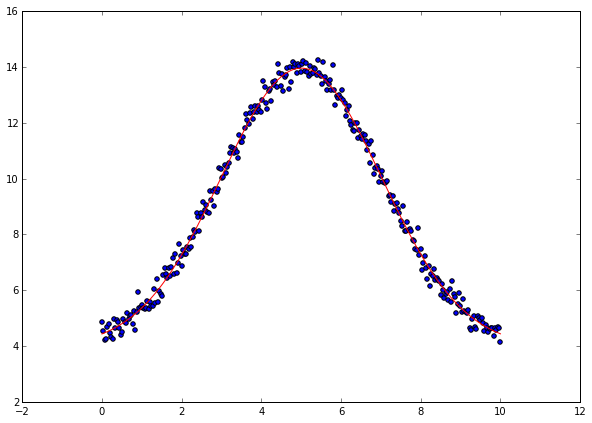

In [22]:
plt.figure(figsize=(10,7))
out = mwgaussfit(x_vals, Data, eps_data)
new_D = out[0][0]*np.exp(-(1.0/2.0)*((out[0][1]-x_vals)/out[0][2])**2)+out[0][3]
plt.plot(x_vals, new_D, 'r')
plt.scatter(x_vals, Data)